#### Sumy_LexRank

In [15]:
# スクレイピング
from urllib import request
from bs4 import BeautifulSoup
import bs4
import spacy

# 要約にはsumyを使用
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [16]:
nlp = spacy.load('ja_ginza')
url = 'https://www.aozora.gr.jp/cards/000329/files/18376_12100.html' #ここに青空文庫のURL
html = request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
body = soup.select('.main_text')

In [17]:
text = ''
for b in body[0]:
    if type(b) == bs4.element.NavigableString:
        text += b
        continue
    text += ''.join([e.text for e in b.find_all('rb')])

In [18]:
# コーパス
corpus = []
originals = []
doc = nlp(text)
for s in doc.sents:
    originals.append(s)
    tokens = []
    for t in s:
        tokens.append(t.lemma_)
    corpus.append(' '.join(tokens))

print(len(corpus))
print(len(originals))

142
142


In [19]:
parser = PlaintextParser.from_string(''.join(corpus), Tokenizer('japanese'))
summarizer = LexRankSummarizer()
summary = summarizer(document=parser.document, sentences_count=2)

In [20]:
summary

(<Sentence: そこ で うち へ 帰る と さっそく 、 お じい さん の 前 へ 出る て 、 「 どうぞ 、 わたくし に しばらく お ひま を 下さる 。>,
 <Sentence: うち で は お じい さん と 、 お ばあ さん が 、 かわるがわる 、 「 もう 桃太郎 が 帰る そう だ もの だ が 。>)

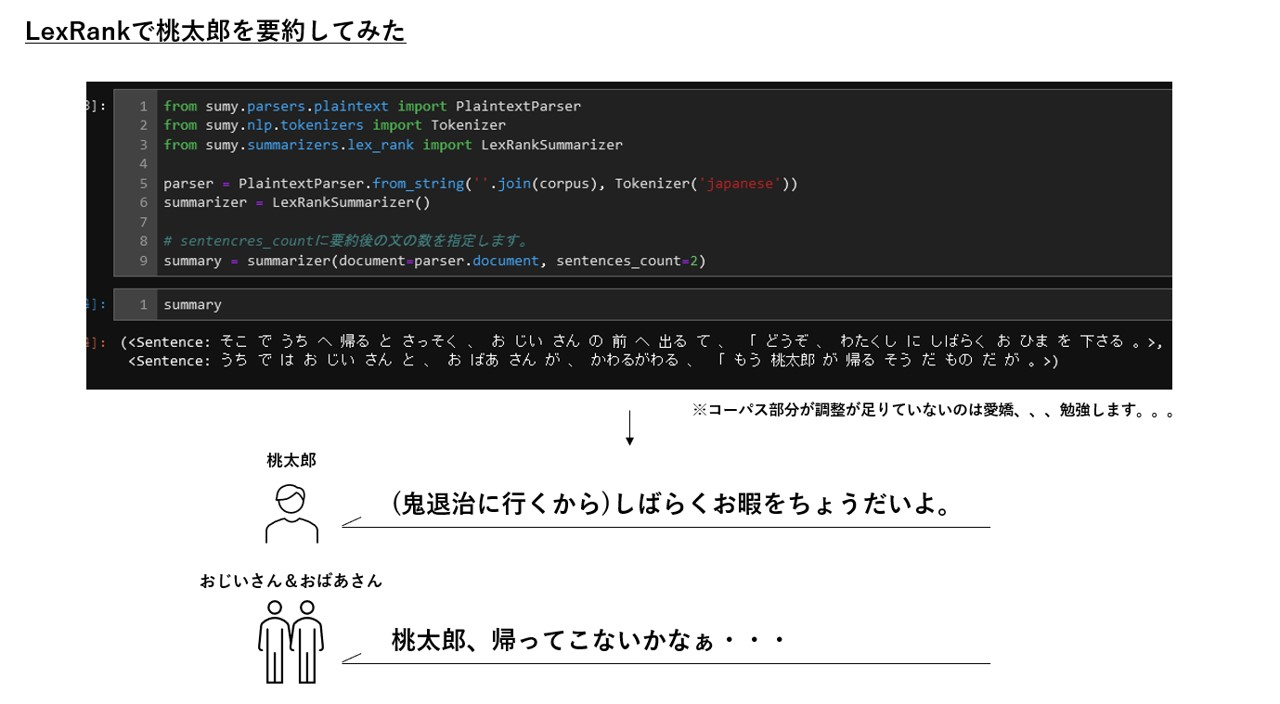

In [22]:
from IPython.display import Image
file_name_1 = "image/桃太郎_sumy_1.jpg"
Image(file_name_1)

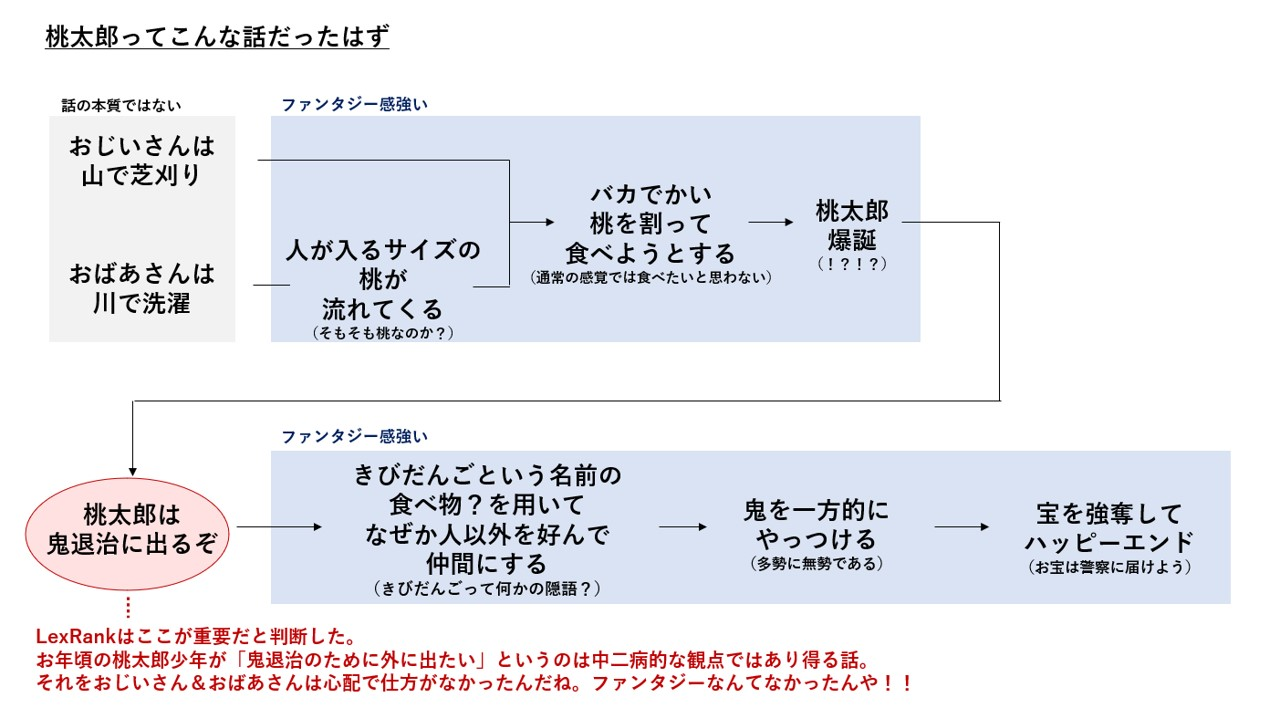

In [23]:
file_name_2 = "image/桃太郎_sumy_2.jpg"
Image(file_name_2)